## Load essential packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, f1_score, 
                             precision_score, recall_score)

from sklearn.model_selection import  train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Model evaluation helper function

def evaluate_model(model, x, y, model_name):
    y_pred = model.predict(x)
    
    f1 = f1_score(y, y_pred, average="macro")
    precision = precision_score(y, y_pred, average="macro")
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average="macro")
    
    print(f"\n{model_name} Results:")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.title(f"{model_name} - Confusion Matrix", size=14)
    plt.show()

    return f1, precision, accuracy, recall

## Extracting data from the UCI repository. 

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# variable information 
glass_identification.variables

,name,role,type,demographic,description,units,missing_values
0,Id_number,ID,Integer,None,None,None,no
1,RI,Feature,Continuous,None,refractive index,None,no
2,Na,Feature,Continuous,None,Sodium,weight percent in corresponding oxide,no
3,Mg,Feature,Continuous,None,Magnesium,weight percent in corresponding oxide,no
4,Al,Feature,Continuous,None,Aluminum,weight percent in corresponding oxide,no
5,Si,Feature,Continuous,None,Silicon,weight percent in corresponding oxide,no
6,K,Feature,Continuous,None,Potassium,weight percent in corresponding oxide,no
7,Ca,Feature,Continuous,None,Calcium,weight percent in corresponding oxide,no
8,Ba,Feature,Continuous,None,Barium,weight percent in corresponding oxide,no
9,Fe,Feature,Continuous,None,Iron,weight percent in corresponding oxide,no


## Combine features and targets into a DataFrame and check for duplicates

In [4]:
df = pd.concat([X, pd.Series(y.squeeze(), name="Class")], axis=1)

# Remove duplicates in place
df.drop_duplicates(inplace=True)

# Re-check for missing and duplicated values after removal
print("After removing duplicates:")
print("Missing values per column:\n", df.isnull().sum())
print(f"Number of duplicated rows: {df.duplicated().sum()}")
print(f"Shape of the DataFrame after cleaning: {df.shape}")

df.head()

After removing duplicates:
Missing values per column:
 RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64
Number of duplicated rows: 0
Shape of the DataFrame after cleaning: (213, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Split dataset into features (x) and target (y)

In [5]:
x = df.loc[:, df.columns[:-1]]
y = df["Class"]

## Addressing class imbalance with SMOTE

#### The data is imbalanced since we observed classes with very high frequency while others have lower frequency (check EDA).
#### We can address this issue using SMOTE (Synthetic Minority Oversampling Technique)

In [6]:
sm = SMOTE(random_state=0)
x, y = sm.fit_resample(x, y)

## Splitting data into training and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

## Scaling the data

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building Different Models

### 1) Logistic Regression


Logistic Regression - Training Results:
F1 Score: 0.84
Precision: 0.84
Accuracy: 0.84
Recall: 0.84


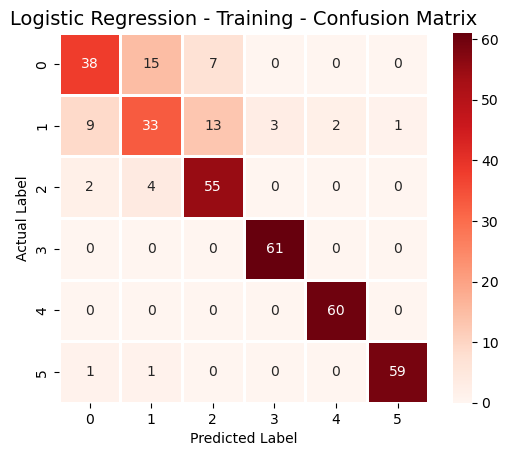


Logistic Regression - Test Results:
F1 Score: 0.76
Precision: 0.76
Accuracy: 0.78
Recall: 0.78


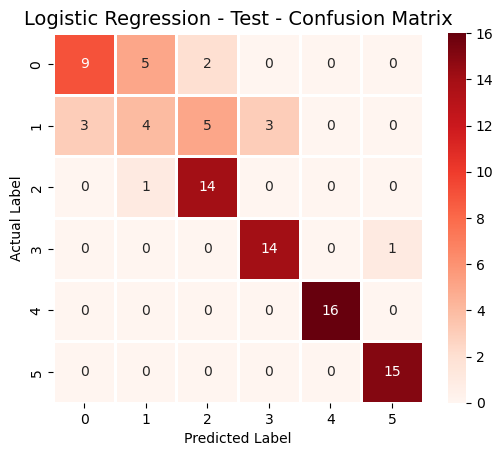

In [9]:
LR = LogisticRegression(random_state=0).fit(x_train_scaled, y_train)
f1_LR_train, precision_LR_train, accuracy_LR_train, recall_LR_train = evaluate_model(LR, x_train_scaled, y_train, "Logistic Regression - Training")
f1_LR_test, precision_LR_test, accuracy_LR_test, recall_LR_test = evaluate_model(LR, x_test_scaled, y_test, "Logistic Regression - Test")

### 2) Support Vector Classifier


Support Vector Classifier - Training Results:
F1 Score: 0.89
Precision: 0.89
Accuracy: 0.89
Recall: 0.89


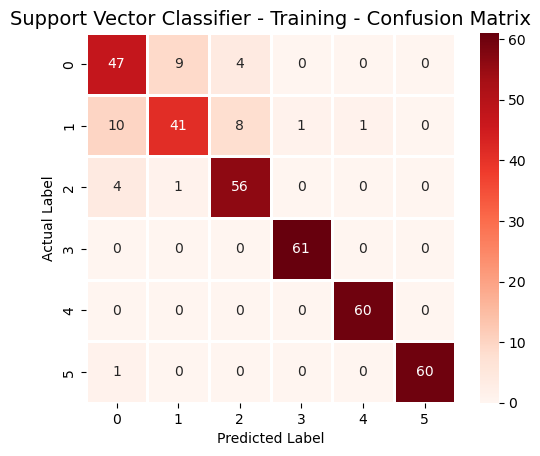


Support Vector Classifier - Test Results:
F1 Score: 0.83
Precision: 0.83
Accuracy: 0.84
Recall: 0.84


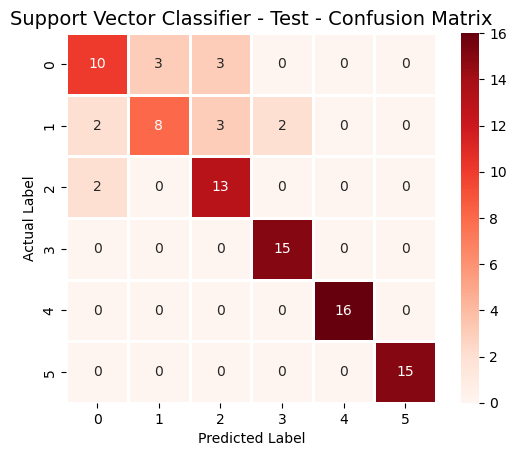

In [10]:
svc = SVC(random_state=0).fit(x_train_scaled, y_train)
f1_svc_train, precision_svc_train, accuracy_svc_train, recall_svc_train = evaluate_model(svc, x_train_scaled, y_train, "Support Vector Classifier - Training")
f1_svc_test, precision_svc_test, accuracy_svc_test, recall_svc_test = evaluate_model(svc, x_test_scaled, y_test, "Support Vector Classifier - Test")

### 3) K-Nearest Neighbors


K-Nearest Neighbors - Training Results:
F1 Score: 0.89
Precision: 0.89
Accuracy: 0.89
Recall: 0.89


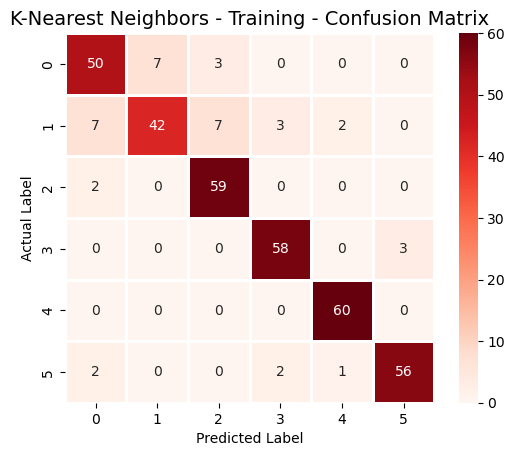


K-Nearest Neighbors - Test Results:
F1 Score: 0.81
Precision: 0.83
Accuracy: 0.83
Recall: 0.83


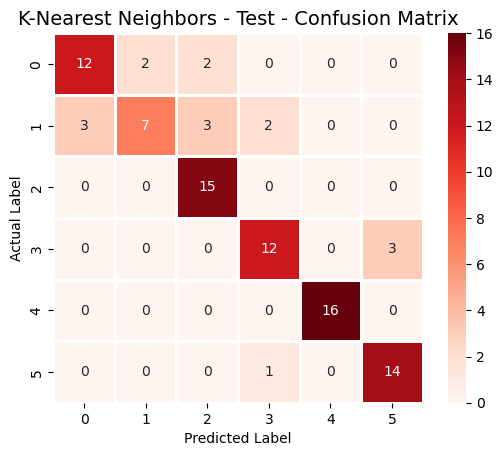

In [11]:
knn = KNeighborsClassifier().fit(x_train_scaled, y_train)
f1_knn_train, precision_knn_train, accuracy_knn_train, recall_knn_train = evaluate_model(knn, x_train_scaled, y_train, "K-Nearest Neighbors - Training")
f1_knn_test, precision_knn_test, accuracy_knn_test, recall_knn_test = evaluate_model(knn, x_test_scaled, y_test, "K-Nearest Neighbors - Test")

### 4) Decision Tree


Decision Tree - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00


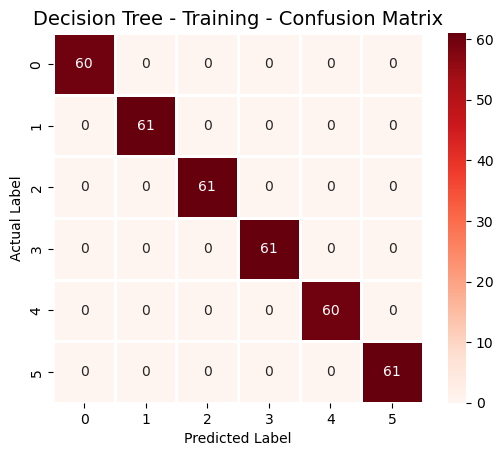


Decision Tree - Test Results:
F1 Score: 0.87
Precision: 0.87
Accuracy: 0.87
Recall: 0.87


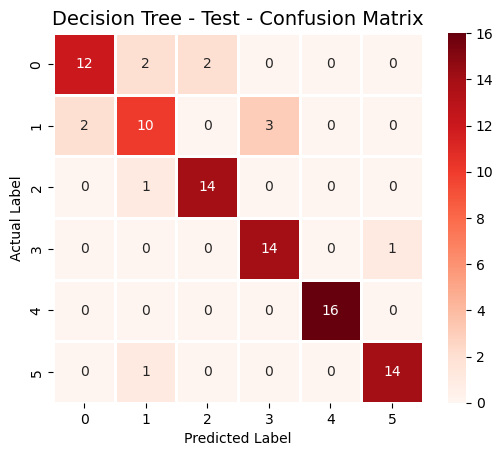

In [12]:
DT = DecisionTreeClassifier(random_state=0).fit(x_train_scaled, y_train)
f1_DT_train, precision_DT_train, accuracy_DT_train, recall_DT_train = evaluate_model(DT, x_train_scaled, y_train, "Decision Tree - Training")
f1_DT_test, precision_DT_test, accuracy_DT_test, recall_DT_test = evaluate_model(DT, x_test_scaled, y_test, "Decision Tree - Test")

### 5) Random Forest


Random Forest - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00


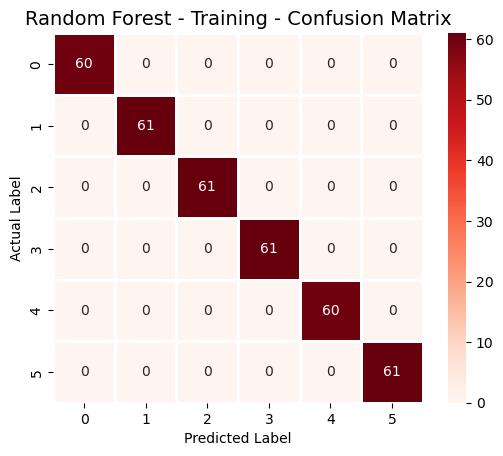


Random Forest - Test Results:
F1 Score: 0.92
Precision: 0.93
Accuracy: 0.92
Recall: 0.92


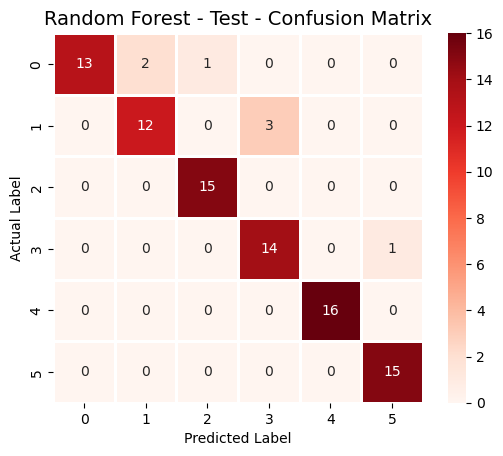

In [13]:
RF = RandomForestClassifier(random_state=0).fit(x_train_scaled, y_train)
f1_RF_train, precision_RF_train, accuracy_RF_train, recall_RF_train = evaluate_model(RF, x_train_scaled, y_train, "Random Forest - Training")
f1_RF_test, precision_RF_test, accuracy_RF_test, recall_RF_test = evaluate_model(RF, x_test_scaled, y_test, "Random Forest - Test")

## Summarizing Results in a DataFrame

In [14]:
# Summary for training set
models_training = ["Logistic Regression", "Support Vector Classifier", "K-Nearest Neighbors", "Decision Tree", "Random Forest Classifier"]
f1_scores_training = [f1_LR_train, f1_svc_train, f1_knn_train, f1_DT_train, f1_RF_train]
precision_scores_training = [precision_LR_train, precision_svc_train, precision_knn_train, precision_DT_train, precision_RF_train]
accuracy_scores_training = [accuracy_LR_train, accuracy_svc_train, accuracy_knn_train, accuracy_DT_train, accuracy_RF_train]
recall_scores_training = [recall_LR_train, recall_svc_train, recall_knn_train, recall_DT_train, recall_RF_train]

results_df_training = pd.DataFrame({
    "Algorithm": models_training,
    "F1 Score": f1_scores_training,
    "Precision": precision_scores_training,
    "Accuracy": accuracy_scores_training,
    "Recall": recall_scores_training
})

# Summary for test set
models_test = ["Logistic Regression", "Support Vector Classifier", "K-Nearest Neighbors", "Decision Tree", "Random Forest Classifier"]
f1_scores_test = [f1_LR_test, f1_svc_test, f1_knn_test, f1_DT_test, f1_RF_test]
precision_scores_test = [precision_LR_test, precision_svc_test, precision_knn_test, precision_DT_test, precision_RF_test]
accuracy_scores_test = [accuracy_LR_test, accuracy_svc_test, accuracy_knn_test, accuracy_DT_test, accuracy_RF_test]
recall_scores_test = [recall_LR_test, recall_svc_test, recall_knn_test, recall_DT_test, recall_RF_test]

results_df_test = pd.DataFrame({
    "Algorithm": models_test,
    "F1 Score": f1_scores_test,
    "Precision": precision_scores_test,
    "Accuracy": accuracy_scores_test,
    "Recall": recall_scores_test
})

print("Results for Training Set")
print("-"*70)
print(results_df_training)
print("-"*70)
print("Results for Test Set")
print("-"*70)
print(results_df_test)
print("-"*70)

Results for Training Set
----------------------------------------------------------------------
                   Algorithm  F1 Score  Precision  Accuracy    Recall
0        Logistic Regression  0.835582   0.836696  0.840659  0.840528
1  Support Vector Classifier  0.891032   0.892166  0.892857  0.892851
2        K-Nearest Neighbors  0.890367   0.892343  0.892857  0.892987
3              Decision Tree  1.000000   1.000000  1.000000  1.000000
4   Random Forest Classifier  1.000000   1.000000  1.000000  1.000000
----------------------------------------------------------------------
Results for Test Set
----------------------------------------------------------------------
                   Algorithm  F1 Score  Precision  Accuracy    Recall
0        Logistic Regression  0.763896   0.762949  0.782609  0.782639
1  Support Vector Classifier  0.830710   0.834687  0.836957  0.837500
2        K-Nearest Neighbors  0.814945   0.825218  0.826087  0.825000
3              Decision Tree  0.866869   

### Hyperparameter Tuning for Logistic Regression

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

Tuned Logistic Regression - Training Results:
F1 Score: 0.86
Precision: 0.86
Accuracy: 0.87
Recall: 0.87


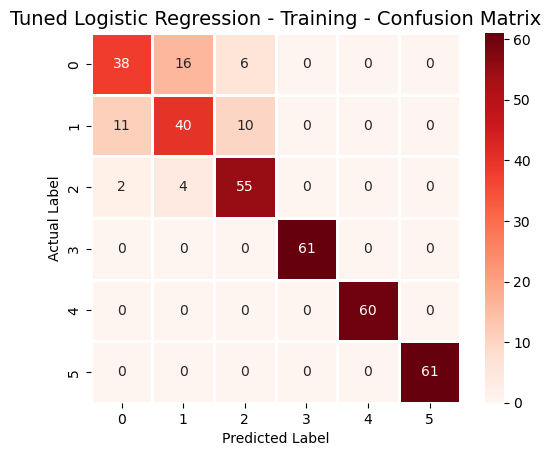


Tuned Logistic Regression -Test Results:
F1 Score: 0.81
Precision: 0.81
Accuracy: 0.83
Recall: 0.83


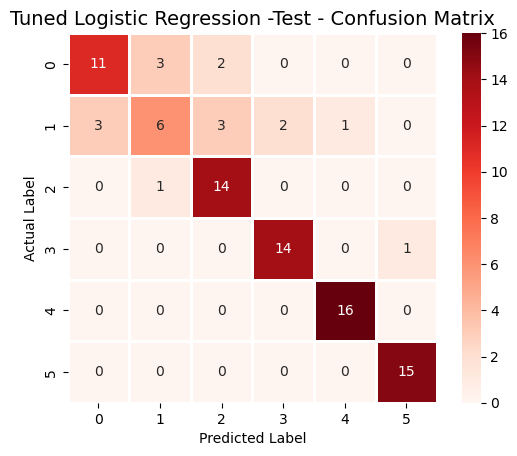

In [15]:
grid_LR = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [100, 1000, 2500, 5000]
}

logistic_cv = GridSearchCV(LogisticRegression(random_state=0), grid_LR, verbose=1, cv=3)
logistic_cv.fit(x_train_scaled, y_train)
best_LR_params = logistic_cv.best_params_

print(f"Best hyperparameters for Logistic Regression: {best_LR_params}")
f1_LR_h_train, precision_LR_h_train, accuracy_LR_h_train, recall_LR_h_train = evaluate_model(logistic_cv, x_train_scaled, y_train, "Tuned Logistic Regression - Training")
f1_LR_h_test, precision_LR_h_test, accuracy_LR_h_test, recall_LR_h_test = evaluate_model(logistic_cv, x_test_scaled, y_test, "Tuned Logistic Regression -Test")

### Hyperparameter Tuning for SVC

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters for SVC: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Tuned SVC - Training Results:
F1 Score: 0.94
Precision: 0.94
Accuracy: 0.94
Recall: 0.94


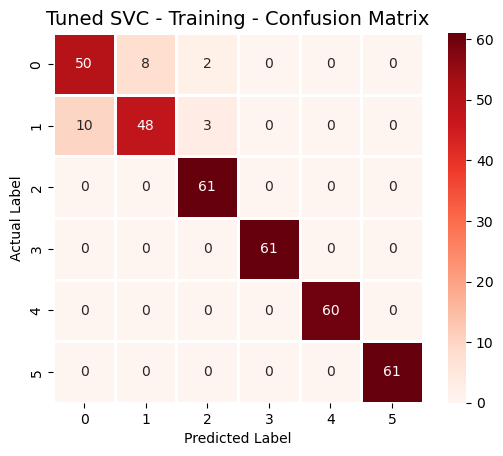


Tuned SVC - Test Results:
F1 Score: 0.87
Precision: 0.87
Accuracy: 0.88
Recall: 0.88


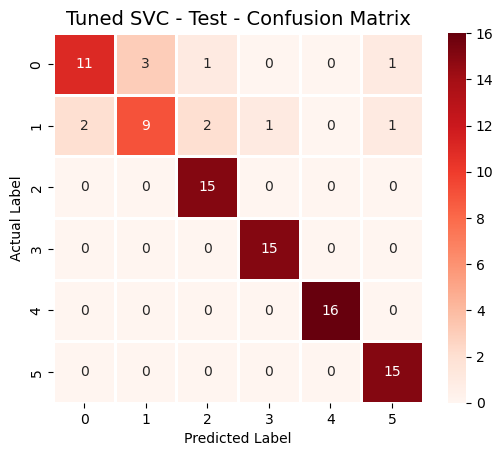

In [16]:
grid_svc = {
    "C": [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}

svc_cv = GridSearchCV(SVC(random_state=0), grid_svc, verbose=1, cv=3)
svc_cv.fit(x_train_scaled, y_train)
best_svc_params = svc_cv.best_params_

print(f"Best hyperparameters for SVC: {best_svc_params}")
f1_svc_h_train, precision_svc_h_train, accuracy_svc_h_train, recall_svc_h_train = evaluate_model(svc_cv, x_train_scaled, y_train, "Tuned SVC - Training")
f1_svc_h_test, precision_svc_h_test, accuracy_svc_h_test, recall_svc_h_test = evaluate_model(svc_cv, x_test_scaled, y_test, "Tuned SVC - Test")

### Hyperparameter Tuning for KNN

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Tuned KNN - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00


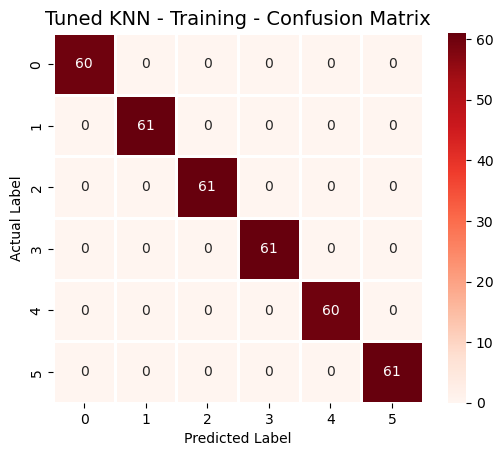


Tuned KNN - Test Results:
F1 Score: 0.93
Precision: 0.94
Accuracy: 0.93
Recall: 0.93


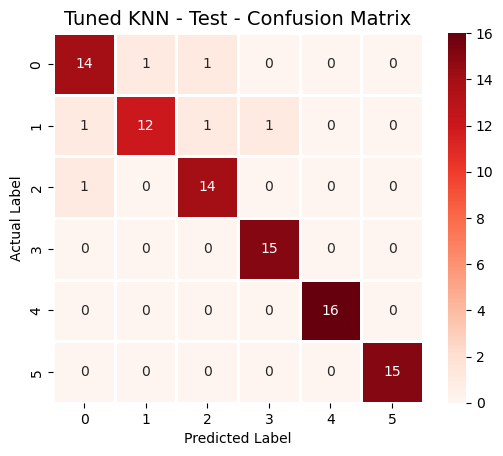

In [17]:
grid_knn = {
    "n_neighbors": np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn_cv = GridSearchCV(KNeighborsClassifier(), grid_knn, verbose=1, cv=3, n_jobs=-1)
knn_cv.fit(x_train_scaled, y_train)
best_knn_params = knn_cv.best_params_

print(f"Best hyperparameters for KNN: {best_knn_params}")
f1_knn_h_train, precision_knn_h_train, accuracy_knn_h_train, recall_knn_h_train = evaluate_model(knn_cv, x_train_scaled, y_train, "Tuned KNN - Training")
f1_knn_h_test, precision_knn_h_test, accuracy_knn_h_test, recall_knn_h_test = evaluate_model(knn_cv, x_test_scaled, y_test, "Tuned KNN - Test")

### Hyperparameter Tuning for Decision Tree Classifier

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Tuned Decision Tree - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00


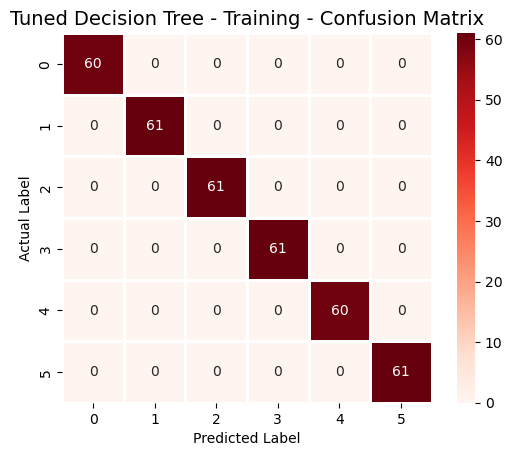


Tuned Decision Tree - Training Results:
F1 Score: 0.87
Precision: 0.87
Accuracy: 0.87
Recall: 0.87


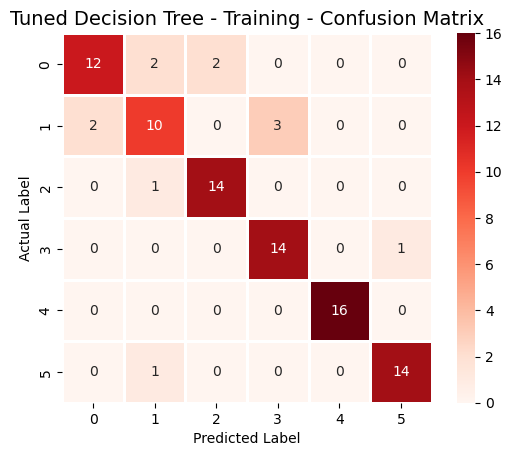

In [18]:
grid_DT = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
}

dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), grid_DT, verbose=1, cv=3, n_jobs=-1)
dt_cv.fit(x_train_scaled, y_train)
best_DT_params = dt_cv.best_params_

print(f"Best hyperparameters for Decision Tree: {best_DT_params}")
f1_DT_h_train, precision_DT_h_train, accuracy_DT_h_train, recall_DT_h_train = evaluate_model(dt_cv, x_train_scaled, y_train, "Tuned Decision Tree - Training")
f1_DT_h_test, precision_DT_h_test, accuracy_DT_h_test, recall_DT_h_test = evaluate_model(dt_cv, x_test_scaled, y_test, "Tuned Decision Tree - Training")

### Hyperparameter Tuning for Random Forest Classifier

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits
Best hyperparameters for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Tuned Random Forest - Training Results:
F1 Score: 0.99
Precision: 0.99
Accuracy: 0.99
Recall: 0.99


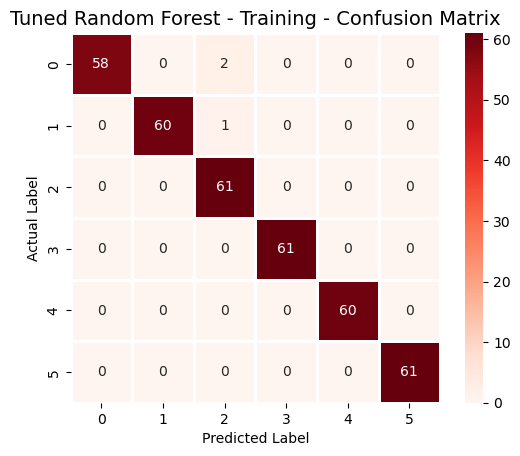


Tuned Random Forest - Test Results:
F1 Score: 0.91
Precision: 0.91
Accuracy: 0.91
Recall: 0.91


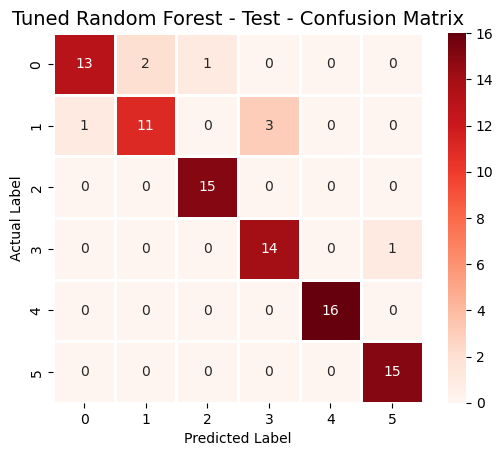

In [19]:
grid_RF = {
    'n_estimators': np.arange(50, 200, 50),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': np.arange(1, 50, 5),
    'bootstrap': [True, False]
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=0), grid_RF, verbose=1, cv=3, n_jobs=-1)
rf_cv.fit(x_train_scaled, y_train)
best_RF_params = rf_cv.best_params_

print(f"Best hyperparameters for Random Forest: {best_RF_params}")
f1_RF_h_train, precision_RF_h_train, accuracy_RF_h_train, recall_RF_h_train = evaluate_model(rf_cv, x_train_scaled, y_train, "Tuned Random Forest - Training")
f1_RF_h_test, precision_RF_h_test, accuracy_RF_h_test, recall_RF_h_test = evaluate_model(rf_cv, x_test_scaled, y_test, "Tuned Random Forest - Test")

## Summarizing Results of Hyperparameter Tuning

In [21]:
# Summary for training set
models_hyper_train = ["Tuned Logistic Regression", "Tuned Support Vector Classifier", "Tuned K-Nearest Neighbors", 
                "Tuned Decision Tree", "Tuned Random Forest"]
f1_scores_h_train = [f1_LR_h_train, f1_svc_h_train, f1_knn_h_train, f1_DT_h_train, f1_RF_h_train]
precision_scores_h_train = [precision_LR_h_train, precision_svc_h_train, precision_knn_h_train, precision_DT_h_train, precision_RF_h_train]
accuracy_scores_h_train = [accuracy_LR_h_train, accuracy_svc_h_train, accuracy_knn_h_train, accuracy_DT_h_train, accuracy_RF_h_train]
recall_scores_h_train = [recall_LR_h_train, recall_svc_h_train, recall_knn_h_train, recall_DT_h_train, recall_RF_h_train]

results_tuned_df_training = pd.DataFrame({
    "Algorithm": models_hyper_train,
    "F1 Score": f1_scores_h_train,
    "Precision": precision_scores_h_train,
    "Accuracy": accuracy_scores_h_train,
    "Recall": recall_scores_h_train
})

results_tuned_df_training

# Summary for test set
models_hyper_test = ["Tuned Logistic Regression", "Tuned Support Vector Classifier", "Tuned K-Nearest Neighbors", 
                "Tuned Decision Tree", "Tuned Random Forest"]
f1_scores_h_test = [f1_LR_h_test, f1_svc_h_test, f1_knn_h_test, f1_DT_h_test, f1_RF_h_test]
precision_scores_h_test = [precision_LR_h_test, precision_svc_h_test, precision_knn_h_test, precision_DT_h_test, precision_RF_h_test]
accuracy_scores_h_test = [accuracy_LR_h_test, accuracy_svc_h_test, accuracy_knn_h_test, accuracy_DT_h_test, accuracy_RF_h_test]
recall_scores_h_test = [recall_LR_h_test, recall_svc_h_test, recall_knn_h_test, recall_DT_h_test, recall_RF_h_test]

results_tuned_df_test = pd.DataFrame({
    "Algorithm": models_hyper_test,
    "F1 Score": f1_scores_h_test,
    "Precision": precision_scores_h_test,
    "Accuracy": accuracy_scores_h_test,
    "Recall": recall_scores_h_test
})

results_tuned_df_test

print("Results for Training Set")
print("-"*70)
print(results_tuned_df_training)
print("-"*70)
print("Results for Test Set")
print("-"*70)
print(results_tuned_df_test)
print("-"*70)

Results for Training Set
----------------------------------------------------------------------
                         Algorithm  F1 Score  Precision  Accuracy    Recall
0        Tuned Logistic Regression  0.863196   0.864402  0.865385  0.865118
1  Tuned Support Vector Classifier  0.935746   0.935786  0.936813  0.936703
2        Tuned K-Nearest Neighbors  1.000000   1.000000  1.000000  1.000000
3              Tuned Decision Tree  1.000000   1.000000  1.000000  1.000000
4              Tuned Random Forest  0.991798   0.992188  0.991758  0.991712
----------------------------------------------------------------------
Results for Test Set
----------------------------------------------------------------------
                         Algorithm  F1 Score  Precision  Accuracy    Recall
0        Tuned Logistic Regression  0.812921   0.812705  0.826087  0.825694
1  Tuned Support Vector Classifier  0.873270   0.874890  0.880435  0.881250
2        Tuned K-Nearest Neighbors  0.933852   0.935096  